<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کنسلی
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این قسمت قصد داریم پیش‌بینی کنیم آیا کاربران بلیط خود را کنسل می‌کنند یا نه. به ازای هر کنسلی، مستربلیط باید به شرکت مسافربری جریمه پرداخت کند! پس بلیط‌های    کنسلی به معنی تحمیل هزینه به شرکت است. از این رو تشخیص دادن بلیط‌هایی که احتمال کنسلی آنان وجود دارد، به مدیریت ریسک شرکت کمک بزرگی می‌کند. 
    <br>
    حال از داده‌هایی که در اختیار داریم استفاده میکنیم تا کنسل شدن یا نشدن سفر را تشخیص دهد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازمان را وارد میکنیم.
</font>
</p>

In [1]:
import pandas as pd
import numpy as np

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه داده آموزشی شامل ۱۰۱۰۱۷ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Created|زمان ثبت بلیط|
|CancelTime|زمانی که مسافر بلیط را کنسل کرده است|
|DepartureTime|زمان حرکت|
|BillID|شناسه خرید|
|TicketID|شناسه بلیط|
|ReserveStatus|وضعیت پرداخت مشتری|
|UserID|شناسه کاربری|
|Male|آیا بلیط متعلق به زن است یا مرد|
|Price|قیمت بلیط بدون تخفیف|
|CouponDiscount|تخفیفی که شخص روی بلیط اعمال کرده است|
|From|مبدا سفر|
|To|مقصد سفر|
|Domestic|آیا سفر، داخلی است یا خارجی|
|VehicleType|جزئیات وسیله نقلیه را مشخص می‌کند|
|VehicleClass|آیا وسیله نقلیه، فرست‌کلس است یا نه|
|Vehicle|نوع وسیله نقلیه|
|HashPassportNumber_p|هش‌شده شماره پاسپورت|
|HashEmail|هش‌شده ایمیل|
|BuyerMobile|هش‌شده شماره موبایل|
|NationalCode|هش‌شده شماره‌ملی|
|TripReason|دلیل سفر|
|Cancel|آیا بلیط کنسل شده‌است یا نه|
    
</font>
</div>
</center>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    مجموعه داده آزمایش نیز مانند مجموعه آموزش است با این تفاوت که ستون <code>Cancel</code> که متغیر هدف مسئله است را در خود ندارد. مجموعه داده آزمایش ۴۳۲۹۳ سطر دارد.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
     در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانیم. از آنجایی که ستون های Created و DepartureTime از جنس زمان هستند پس آنهارا به صورت نمونه ای از کلاس DateTime میخوانیم.
</font>
</p>

In [2]:
train_data = pd.read_csv('../data/train_data.csv',parse_dates=['Created','DepartureTime'])
train_data.head()

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-26 13:33:20.457,NaN,2022-07-26 16:30:00,38428546,7445571.0,3,NaN,True,1180000.0,0.0,...,1,VIPمانیتوردار-شارژراختصاصی تخت شو مارال (جدید)...,True,Work,Bus,0,NaN,NaN,302222356019,330024570
1,2022-10-27 23:07:01.837,2022-10-27 23:26:39.070,2022-10-29 09:45:00,39768762,7762719.0,5,NaN,False,1050000.0,0.0,...,1,classicus 2+2,True,Int,Bus,1,NaN,NaN,900764168521,995520696
2,2022-09-12 11:01:13.607,NaN,2022-10-03 18:35:00,39128001,2327596.0,5,800398.0,False,4674000.0,0.0,...,1,فوکر 100,False,Int,Plane,0,NaN,1c44d7a76b52341fa12dcfa993138576befcc9ebf01d14...,749804783291,979382950
3,2022-08-08 17:43:35.840,NaN,2022-08-08 22:30:00,38606546,7495440.0,3,NaN,True,1200000.0,0.0,...,1,VIPدرسا+مانیتوردار+شارژراختصاصی+پذیرایی,True,Work,Bus,0,NaN,NaN,781396205677,911237229
4,2022-11-01 15:12:56.823,NaN,2022-11-03 11:30:00,39822185,2356902.0,5,NaN,True,6222000.0,0.0,...,1,NaN,False,Work,Plane,0,NaN,bb38b345aec02255e31d178492907175c5984f2a1f5b59...,524576220177,727496008


In [3]:
test_data = pd.read_csv('../data/test_data.csv',parse_dates=['Created','DepartureTime'])
test_data.head()

,Created,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,To,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-08 12:04:46.290,2022-08-16 23:59:00,38166794,2890395.0,2,NaN,False,2043000.0,0.0,مشهد,تهران,1,3 ستاره 6 تخته پارسي,NaN,Int,Train,NaN,NaN,419509763088,660703096
1,2022-09-30 14:18:23.487,2022-09-30 23:59:00,39424175,7669420.0,3,NaN,False,1220000.0,0.0,تهران,اصفهان,1,V I P,True,Int,Bus,NaN,NaN,935955347521,960594437
2,2022-05-15 10:52:01.293,2022-06-06 17:40:00,37336619,2783057.0,2,800538.0,True,2132000.0,0.0,مشهد,تهران,1,4ستاره 4تخته سبز نوين,NaN,Int,Train,NaN,NaN,428059757595,854730165
3,2022-10-06 02:55:53.723,2022-10-14 19:45:00,39507715,7691289.0,5,950983.0,False,520000.0,0.0,تهران,سمنان,1,اسکانیا,True,Work,Bus,NaN,012dca1b2070c32e03238f49aa8f12a1a9ce580f8b1368...,515601565031,850531769
4,2022-03-12 13:46:40.300,2022-03-12 19:30:00,36422079,6901256.0,3,NaN,True,1180000.0,0.0,ارومیه,کرمانشاه,1,اسکانیا تک صندلی,True,Work,Bus,NaN,NaN,633910237635,893186872


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا ستون هارا بررسی میکنیم.
    <br>
    ستون های UserID , HashPassportNumber_p , Hashemail , BuyerMobile و NationalCode مربوط به اطلاعات هر فرد هستند که نیازی به آنها نداریم زیرا اینکه کسی بیلیت خود را کنسل کرده یا نه به این متغیرها وابسته نیست.
    <br>
    ستونا های BillID و TicketID در ظاهر به دردمان نمیخورند ولی میتوانیم تشخیص دهیم که هر خرید(BillID) مربوط به چند بیلیت(TicketID) است.
    <br>
    ستون های From , To و VehicleType میتوانند مفید باشند ولی همانطور که در زیر مشاهده میشود، مقادیر تنوع خیلی بالایی دارند و در داده های تست میتوانند متفاوت باشند پس آنها را هم حذف میکنیم تا فرآیند یادگیری را مختل نکنند.
</font>
</p>

In [4]:
train_data['From'].value_counts()

From
تهران      29500
مشهد       11500
اصفهان      9476
شیراز       6356
یزد         3728
           ...  
کویت           1
میناب          1
رم             1
استکهلم        1
میلان          1
Name: count, Length: 226, dtype: int64

In [5]:
train_data['To'].value_counts()

To
تهران         29755
مشهد          13262
اصفهان         6859
شیراز          4834
یزد            3671
              ...  
خرم بید           1
آمستردام          1
پراگ              1
صوفیه             1
قیروکارزین        1
Name: count, Length: 300, dtype: int64

In [6]:
train_data['VehicleType'].value_counts()

VehicleType
4 ستاره اتوبوسي صبا                              6181
3 ستاره 6 تخته پارسي                             3020
25 نفره (VIP)                                    2209
4 ستاره 4 تخته غزال                              2015
4 ستاره اتوبوسي نگين                             1816
                                                 ... 
VIP مارال کلاس تخت شو با شارژر اختصاصی              1
SCANIA تک صندلی 25 تایی معمولی (بدون مانیتور)       1
تک صندلی مارال- ۳۲ نفره                             1
اسکانیا ۴۴نفره -  توجه - نرخ فروش علی الحساب        1
وی ای پی تخت شو  تلفن :-                            1
Name: count, Length: 3150, dtype: int64

In [7]:
uselessCols = ['UserID','From','To','VehicleType','HashPassportNumber_p','HashEmail','BuyerMobile','NationalCode']
train_data = train_data.drop(uselessCols,axis=1)
test_data = test_data.drop(uselessCols,axis=1)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ستون CancelTime فقط در داده آموزش هست و در تست نیست پس باید آنرا حذف کنیم.همچنین این ستون در صورتی مقدار دارد که بیلیت کنسل شده باشد که کنسلی خود متغیر هدف ما هست پس وجود این ستون در داده های آموزش منطقی نیست.
</font>
</p>

In [8]:
train_data = train_data.drop('CancelTime',axis=1)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال به سراغ مقادیر گمشده (missing values)  میرویم تا آنها را پر کنیم.
</font>
</p>

In [9]:
train_data.isna().sum()

Created               0
DepartureTime         0
BillID                0
TicketID              0
ReserveStatus         0
Male                  0
Price                 0
CouponDiscount        0
Domestic              0
VehicleClass      38351
TripReason            0
Vehicle               0
Cancel                0
dtype: int64

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    فقط ستون VehicleClass دارای مقدار گمشده (missing value) است.
    <br>
    این ستون تا حدودی به ستون Vehicle مرتبط است یعنی هر وسیله نقلیه توزیع کلاس های مربوط به خود را دارد، پس میتوانیم برای پر کردن مقادیر گمشده ستون VehicleClass از مود این مقادیر که مربوط به یک Vehicle مشخص هستند استفاده کنیم.
</font>
</p>

In [10]:
def fill_with_mode(series):
    # Get mode of the current group
    group_mode = series.mode()
    
    # If group has a mode, fill NaN with it
    if not group_mode.empty:
        series_filled = series.fillna(group_mode.iloc[0])
    else:
        # If group has no mode, fill with global mode
        global_mode = train_data['VehicleClass'].mode()
        if not global_mode.empty:
            series_filled = series.fillna(global_mode.iloc[0])
        else:
            # If even global mode is missing, leave as-is (all NaN)
            series_filled = series
    
    return series_filled

# Apply the filling
train_data['VehicleClass'] = train_data.groupby('Vehicle')['VehicleClass'].transform(fill_with_mode)
test_data['VehicleClass'] = test_data.groupby('Vehicle')['VehicleClass'].transform(fill_with_mode)

/tmp/ipykernel_28311/78041988.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series_filled = series.fillna(group_mode.iloc[0])
/tmp/ipykernel_28311/78041988.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series_filled = series.fillna(global_mode.iloc[0])
/tmp/ipykernel_28311/78041988.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [11]:
test_data.isna().sum()

Created           0
DepartureTime     0
BillID            0
TicketID          0
ReserveStatus     0
Male              0
Price             0
CouponDiscount    0
Domestic          0
VehicleClass      0
TripReason        0
Vehicle           0
dtype: int64

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    از آنجایی که ستون های DepartureTime و Created از نوع زمان هستند پس ویژگی هایی که لازم داریم از آنها استخراج میکنیم:
    <br>
    -
    روز حرکت و ماه حرکت میتوانند تا حدودی مفید باشند.
    <br>
    -
     تعداد روز های باقی مانده تا روز حرکت هنگاه خرید بیلیت هم میتواند در کنسلی مؤثر باشد.مثلاً انتظار میرود وقتی این فاصله زیاد است احتمال تغییر بیلیت و کنسل کردن قبلی بیشتر باشد.
    <br>
    -
    اینکه تاریخ حرکت در روز های تعطیل  یا در ساعت های خواب بوده است هم میتواند بر کنسلی تاثیر بگذارد.مثلا ممکن هست فردی بیلیت نیمه شب خود را کنسل کند زیرا بیلیت در ساعت بهتری خالی شده باشد.
    <br>
    -
    همانطور که در ابتدا گفته شد تعداد هر بیلیت در هرشناسه خرید میتواند نشان دهد چند نفره بیلیت خریداری شده است مثلا با خانواده بوده یا فردی. از این رو این ویژگی هم میتواند بسیار کمک کننده باشد.
</font>
</p>

In [12]:
train_data['DepartureDay'] = train_data['DepartureTime'].dt.day_name()
test_data['DepartureDay'] = test_data['DepartureTime'].dt.day_name()

In [13]:
train_data['DepartureMonth'] = train_data['DepartureTime'].dt.month
test_data['DepartureMonth'] = test_data['DepartureTime'].dt.month

In [14]:
train_data['DayBetweenDepartureAndCreate'] = (train_data['DepartureTime'] - train_data['Created']).dt.days
test_data['DayBetweenDepartureAndCreate'] = (test_data['DepartureTime'] - test_data['Created']).dt.days

In [15]:
def isHoliday(dt):
    if dt.day_name()=='Friday' or dt.day_name()=='Thursday':
        return 1
    m = dt.month
    if m==1 or m==4 or m==5 or m==6:
        return 1
    return 0
train_data['DepartureIsHoliday'] = train_data['DepartureTime'].apply(isHoliday)
test_data['DepartureIsHoliday'] = test_data['DepartureTime'].apply(isHoliday)

In [16]:
def isSleepTime(dt):
    h = dt.hour
    if h<=8 :
        return 1
    return 0
train_data['DepartureIsSleepTime'] = train_data['DepartureTime'].apply(isSleepTime)
test_data['DepartureIsSleepTime'] = test_data['DepartureTime'].apply(isSleepTime)

In [17]:
train_data['PopulationPerBill'] = train_data.groupby('BillID')['TicketID'].transform('count')
test_data['PopulationPerBill'] = test_data.groupby('BillID')['TicketID'].transform('count')

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال که ستون های مورد نیاز خود را استخراج کردیم میتوانیم آنهایی را که نیازی نداریم پاک کنیم.
</font>
</p>

In [18]:
uselessCols = ['Created','DepartureTime','BillID','TicketID']
train_data = train_data.drop(uselessCols,axis=1)
test_data = test_data.drop(uselessCols,axis=1)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال به سراغ عددی کردن ستون های خود میرویم.
    <br>
    ستون TripReason یک ستون باینری هست پس مقادیر آنرا به 0 و 1 تغییر میدهیم.
    <br>
    ستون های Vehicle و DepartureDay از نوع دسته ای اسمی هستند پس آنها را به شیوه One Hot تبدیل به ستون های باینری میکنیم. 
</font>
</p>

In [19]:
replacements = {'TripReason':{'Work':1,'Int':0}}
nominalCols = ['Vehicle','DepartureDay']

In [20]:
for col,value in replacements.items():
    train_data[col] = train_data[col].map(value)
    test_data[col] = test_data[col].map(value)

In [21]:
train_dummies = pd.get_dummies(train_data[nominalCols], drop_first=True)
train_data = pd.concat([train_data.drop(nominalCols, axis=1), train_dummies], axis=1)

test_dummies = pd.get_dummies(test_data[nominalCols], drop_first=True)
test_data = pd.concat([test_data.drop(nominalCols, axis=1), test_dummies], axis=1)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال به بررسی داده های پرت میپردازیم.
    <br>
    ستون های غیرباینری موجود در این دیتا میتوانند داده پرت داشته باشند.مثلا برای ستون  Price طبیعی است که مقدار پرت داشته باشد یعنی جزئی از توزیع داده ها است، زیرا قیمت سفر هایی که مثلا با هواپیما هستند و مسیر های دوری هم دارند اختلاف قیمت زیادی با سفر های با اتوبوس که تکرار بالایی دارند دارد.
    <br>
    پس نیازی به حذف مقادیر پرت در این دیتا نیست.
</font>
</p>

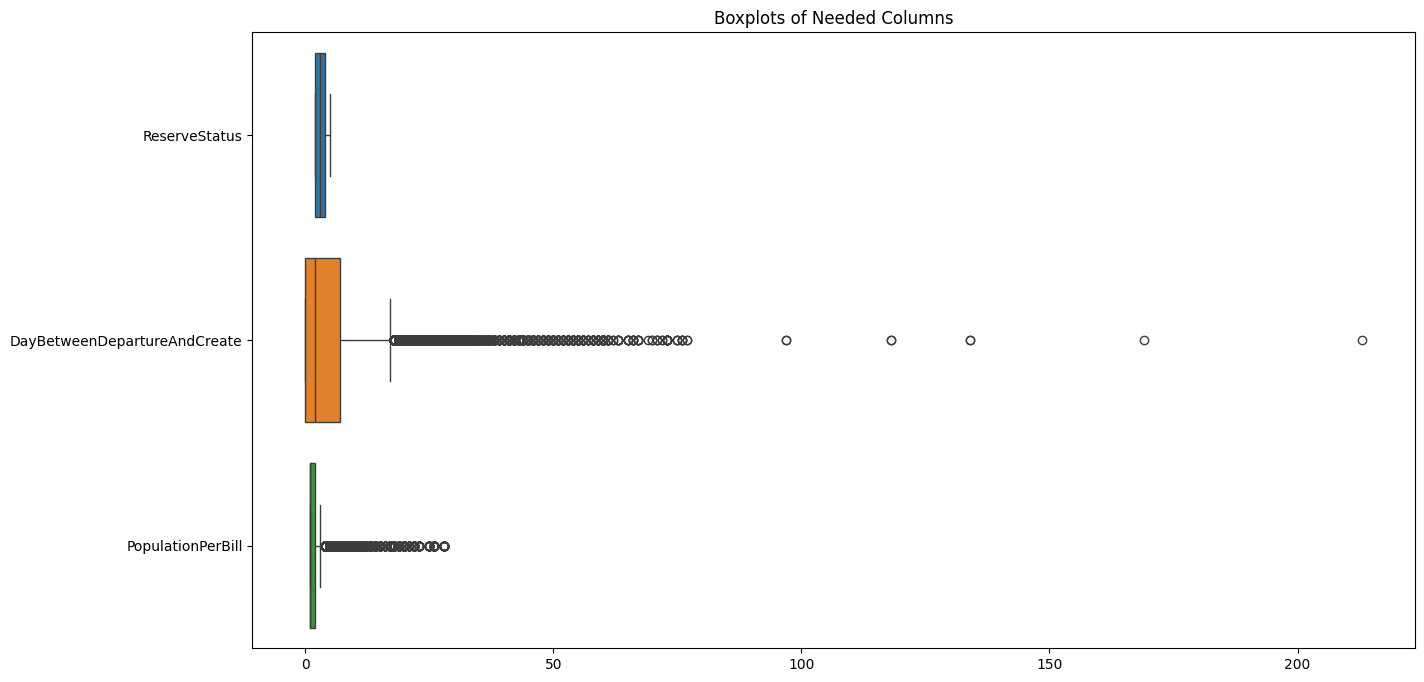

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a single figure with subplots
plt.figure(figsize=(15, 8))  # Adjust width & height as needed
cols = ['ReserveStatus','DayBetweenDepartureAndCreate','PopulationPerBill']
sns.boxplot(data=train_data[cols], orient="h")  # Horizontal boxplots
plt.title("Boxplots of Needed Columns")
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال ستون های عددی را استانداردسازی میکنیم.
</font>
</p>

In [23]:
train_data.describe()

,ReserveStatus,Price,CouponDiscount,Domestic,TripReason,Cancel,DepartureMonth,DayBetweenDepartureAndCreate,DepartureIsHoliday,DepartureIsSleepTime,PopulationPerBill
count,101017.000000,1.010170e+05,1.010170e+05,101017.000000,101017.000000,101017.000000,101017.000000,101017.000000,101017.000000,101017.000000,101017.000000
mean,3.163012,3.209691e+06,4.975680e+03,0.992100,0.559134,0.151470,7.314036,5.532326,0.468208,0.172129,2.179346
std,1.077199,6.985928e+06,7.074863e+04,0.088529,0.496493,0.358508,2.453425,8.104405,0.498991,0.377495,2.267064
min,2.000000,-1.514000e+06,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.080000e+06,0.000000e+00,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.690000e+06,0.000000e+00,1.000000,1.000000,0.000000,8.000000,2.000000,0.000000,0.000000,1.000000
75%,4.000000,3.067000e+06,0.000000e+00,1.000000,1.000000,0.000000,9.000000,7.000000,1.000000,0.000000,2.000000
max,5.000000,3.837646e+08,1.443333e+07,1.000000,1.000000,1.000000,12.000000,213.000000,1.000000,1.000000,28.000000


In [24]:
from sklearn.preprocessing import StandardScaler

stds = StandardScaler()
cols = ['ReserveStatus','Price','CouponDiscount','DepartureMonth','DayBetweenDepartureAndCreate','PopulationPerBill']

for col in cols:
    train_data[col] =  stds.fit_transform(train_data[[col]])
    test_data[col] =  stds.transform(test_data[[col]])
train_data.describe()

,ReserveStatus,Price,CouponDiscount,Domestic,TripReason,Cancel,DepartureMonth,DayBetweenDepartureAndCreate,DepartureIsHoliday,DepartureIsSleepTime,PopulationPerBill
count,1.010170e+05,1.010170e+05,1.010170e+05,101017.000000,101017.000000,101017.000000,1.010170e+05,1.010170e+05,101017.000000,101017.000000,1.010170e+05
mean,-1.801380e-16,-3.390336e-17,5.240250e-18,0.992100,0.559134,0.151470,1.019914e-16,7.726731e-17,0.468208,0.172129,-7.019825e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,0.088529,0.496493,0.358508,1.000005e+00,1.000005e+00,0.498991,0.377495,1.000005e+00
min,-1.079669e+00,-6.761756e-01,-7.032934e-02,0.000000,0.000000,0.000000,-2.573573e+00,-6.826354e-01,0.000000,0.000000,-5.202111e-01
25%,-1.079669e+00,-3.048559e-01,-7.032934e-02,1.000000,0.000000,0.000000,-9.431909e-01,-6.826354e-01,0.000000,0.000000,-5.202111e-01
50%,-1.513304e-01,-2.175370e-01,-7.032934e-02,1.000000,1.000000,0.000000,2.795958e-01,-4.358548e-01,0.000000,0.000000,-5.202111e-01
75%,7.770078e-01,-2.042554e-02,-7.032934e-02,1.000000,1.000000,0.000000,6.871913e-01,1.810967e-01,1.000000,0.000000,-7.910978e-02
max,1.705346e+00,5.447477e+01,2.039393e+02,1.000000,1.000000,1.000000,1.909978e+00,2.559950e+01,1.000000,1.000000,1.138952e+01


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    همانطور که در زیر مشاهده میشود ستون های Male و CouponDiscount وابستگی پایینی با متغیر هدف ما دارند و از آنجایی که این وابستگی خیلی نزدیک به صفر است پس این ستون ها با ستون هدف مستقل هستند و میتوانیم آنها را حذف کنیم.
</font>
</p>

In [25]:
train_data.corr()['Cancel']

ReserveStatus                   0.540511
Male                            0.006438
Price                          -0.011613
CouponDiscount                 -0.000711
Domestic                        0.017115
VehicleClass                    0.032962
TripReason                     -0.017536
Cancel                          1.000000
DepartureMonth                  0.050556
DayBetweenDepartureAndCreate    0.103999
DepartureIsHoliday             -0.024628
DepartureIsSleepTime            0.011722
PopulationPerBill              -0.017176
Vehicle_InternationalPlane     -0.017115
Vehicle_Plane                  -0.025979
Vehicle_Train                   0.069017
DepartureDay_Monday            -0.004056
DepartureDay_Saturday           0.000677
DepartureDay_Sunday            -0.004692
DepartureDay_Thursday           0.014150
DepartureDay_Tuesday           -0.005671
DepartureDay_Wednesday          0.002041
Name: Cancel, dtype: float64

In [26]:
cols = ['Male','CouponDiscount']
train_data = train_data.drop(cols,axis=1)
test_data = test_data.drop(cols,axis=1)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    داده های تست که جدا هستند.حال نیاز به داده های validation داریم تا عملکرد مدل آموزشی خود را بررسی کنیم.
</font>
</p>

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(train_data.drop('Cancel',axis=1),
                                                train_data['Cancel'],test_size=.2,
                                                random_state=535, stratify=train_data['Cancel'])


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده  ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌ایم، وقت آن است که مدل خود را آموزش دهیم.
    <br>
 در اینجا از مدل های تجمعی جنگل تصادفی و xgboost استفاده کرده ایم.
</font>
</p>

In [28]:
from sklearn.ensemble import RandomForestClassifier

model_rf =  RandomForestClassifier(n_estimators=300)
model_rf.fit(x_train,y_train)
y_predict_rf = model_rf.predict(x_val)

In [29]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(n_estimators=300)
model_xgb.fit(x_train, y_train)
y_predict_xgb = model_xgb.predict(x_val)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>f1_score</code> است.
    <br>
    همچنین از classification_report و confusion_matrix هم برای مدلی که f1_score بالاتری دارد استفاده کرده ایم.
    </font>
</p>

In [30]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
print("f1 score for RF: ",f1_score( y_val , y_predict_rf ))
print("f1 score for XGB: ",f1_score( y_val , y_predict_xgb ))

f1 score for RF:  0.9502613387287135
f1 score for XGB:  0.9441350210970464


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17144
           1       0.98      0.92      0.95      3060

    accuracy                           0.99     20204
   macro avg       0.98      0.96      0.97     20204
weighted avg       0.99      0.99      0.99     20204



<Axes: >

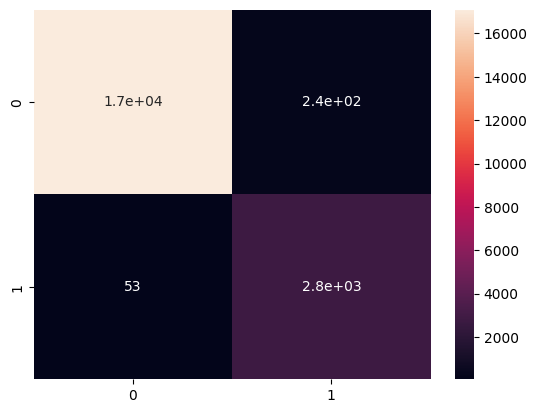

In [31]:
print(classification_report(y_val, y_predict_rf))

sns.heatmap(confusion_matrix(y_predict_rf, y_val), annot=True)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی داریم که می‌تواند ما را  به متغیر هدف برساند.
    <br>
    حال از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده می کنیم و نتایج را در قالب جدول (<code>dataframe</code>) زیر ارائه می دهیم.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|------|---|
|Cancel|آیا بلیط کنسل می‌شود یا نه|
    
</font>
</div>



In [32]:
y_test = pd.DataFrame({'Cancel':model_rf.predict(test_data)})
y_test

,Cancel
0,0
1,0
2,0
3,1
4,0
...,...
43288,0
43289,0
43290,0
43291,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
منابع
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    دیتا ها و مسئله های مربوط به این پروژه از وبسایت کوئرا تهیه شده است.
</font>
</p>
<div align=center>
<a style="line-height:200%;font-family:vazir;color:#0099cc">https://quera.org</a>
</div>


